# 타이타닉 데이터 이진분류 정확도 경시대회
- Seaborn titanic data: **전처리는 ML에서 했던대로 할 것**
- random_state = 2022
- train_test_split : test_size=0.2
- validation_split = 0.2

### - 신경망을 사용해서 정확도 도출
### - 모델 정의/설정/실행/학습 --> 임의로 결정
### - 파일명: 이름0.----.html 형식으로 저장&제출

In [ ]:
# 필요한 패키지 임포트
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

## 1. 데이터 전처리

In [ ]:
# 데이터 불러오기
df = sns.load_dataset('titanic')
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [ ]:
# 필요한 컬럼만 가져오기
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'deck']]
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN


In [ ]:
df.shape

(891, 9)

In [ ]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

In [ ]:
# age 결측치 - 평균 나이로 채우기
df.age.fillna(df.age.mean(), inplace=True)
# deck 결측치 - drop
df.drop(columns=['deck'], inplace=True)

In [ ]:
# embarked - 최빈값으로 채우기
# 최빈값 찾기
print(df.embarked.value_counts())

S    644
C    168
Q     77
Name: embarked, dtype: int64


In [ ]:
# embarked - Q 로 채우기
df.embarked.fillna('Q', inplace=True)

In [ ]:
# 결측치 확인
df.isna().sum().sum()

0

In [ ]:
# 카테고리 값: sex, embarked 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.sex = le.fit_transform(df.sex)
df.embarked = le.fit_transform(df.embarked)
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2


In [ ]:
# X data : scaling
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df.iloc[:,1:].values)

## 2. 학습/테스트 데이터셋 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df.iloc[:,0].values, stratify=df.iloc[:,0].values, test_size=0.2, random_state=seed
)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

## 3. 모델 정의/설정

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(30, input_dim=7, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                240       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 725
Trainable params: 725
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- 모델 저장 관련 설정

In [ ]:
import os   # 파일(디렉토리) 생성
if not os.path.exists('model'): # 디렉토리 존재 여부 확인
    os.mkdir('model')   # 디렉토리 생성

In [ ]:
model_path = 'model/titanic.h5'

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(
    model_path, monitor='val_loss', verbose=1, save_best_only=True
)

- 조기 중단 관련 설정

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=20)

## 4. 모델 학습/저장

In [ ]:
hist = model.fit(X_train, y_train, validation_split=0.2, verbose=0,
                 epochs=200, batch_size=200,
                 callbacks=[checkpoint, early_stopping])


Epoch 00001: val_loss improved from inf to 0.79185, saving model to model/titanic.h5

Epoch 00002: val_loss improved from 0.79185 to 0.76247, saving model to model/titanic.h5

Epoch 00003: val_loss improved from 0.76247 to 0.73687, saving model to model/titanic.h5

Epoch 00004: val_loss improved from 0.73687 to 0.71500, saving model to model/titanic.h5

Epoch 00005: val_loss improved from 0.71500 to 0.69595, saving model to model/titanic.h5

Epoch 00006: val_loss improved from 0.69595 to 0.67966, saving model to model/titanic.h5

Epoch 00007: val_loss improved from 0.67966 to 0.66495, saving model to model/titanic.h5

Epoch 00008: val_loss improved from 0.66495 to 0.65182, saving model to model/titanic.h5

Epoch 00009: val_loss improved from 0.65182 to 0.63990, saving model to model/titanic.h5

Epoch 00010: val_loss improved from 0.63990 to 0.62902, saving model to model/titanic.h5

Epoch 00011: val_loss improved from 0.62902 to 0.61890, saving model to model/titanic.h5

Epoch 00012: 

## 5. 모델 평가

In [ ]:
from tensorflow.keras.models import load_model
best_model = load_model(model_path)
best_model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4045 - accuracy: 0.8268


[0.4044642448425293, 0.826815664768219]

## 6. 학습 과정 시각화

In [ ]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

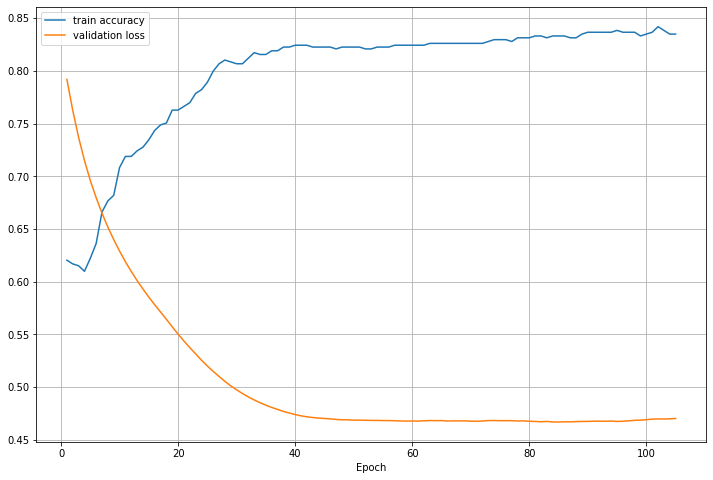

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms=5, label='train accuracy')
plt.plot(xs, y_vloss, ms=5, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

## 7. Epoch & Batch_size 값 다르게 해서 모델 정의/설정/학습/평가

In [ ]:
del model

In [ ]:
model = Sequential([
    Dense(30, input_dim=7, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_split=0.2, verbose=0,
                 epochs=1000, batch_size=200,
                 callbacks=[checkpoint, early_stopping])


Epoch 00001: val_loss did not improve from 0.46691

Epoch 00002: val_loss did not improve from 0.46691

Epoch 00003: val_loss did not improve from 0.46691

Epoch 00004: val_loss did not improve from 0.46691

Epoch 00005: val_loss did not improve from 0.46691

Epoch 00006: val_loss did not improve from 0.46691

Epoch 00007: val_loss did not improve from 0.46691

Epoch 00008: val_loss did not improve from 0.46691

Epoch 00009: val_loss did not improve from 0.46691

Epoch 00010: val_loss did not improve from 0.46691

Epoch 00011: val_loss did not improve from 0.46691

Epoch 00012: val_loss did not improve from 0.46691

Epoch 00013: val_loss did not improve from 0.46691

Epoch 00014: val_loss did not improve from 0.46691

Epoch 00015: val_loss did not improve from 0.46691

Epoch 00016: val_loss did not improve from 0.46691

Epoch 00017: val_loss did not improve from 0.46691

Epoch 00018: val_loss did not improve from 0.46691

Epoch 00019: val_loss did not improve from 0.46691

Epoch 00020

In [ ]:
from tensorflow.keras.models import load_model
best_model = load_model(model_path)
best_model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8436


[0.41315561532974243, 0.8435754179954529]

- 학습 과정 시각화

In [ ]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

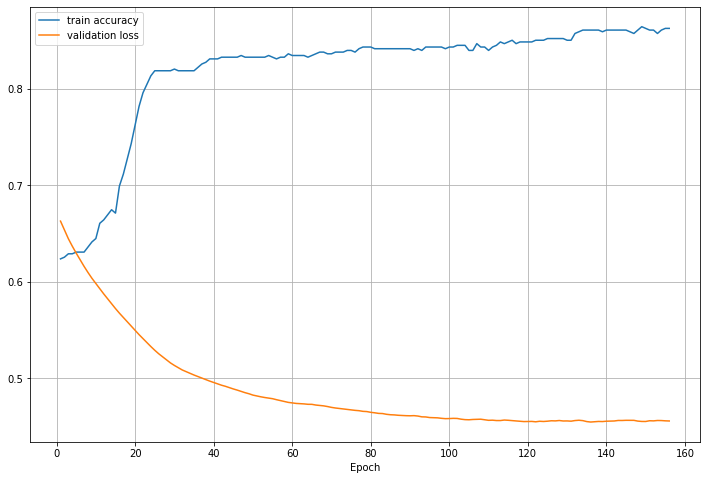

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms=5, label='train accuracy')
plt.plot(xs, y_vloss, ms=5, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

## 8. 은닉층 갯수 늘려서 모델 정의/설정/학습/평가

- 은닉층 4개 → 6개 증가

In [ ]:
del model2

In [ ]:
model2 = Sequential([
    Dense(64, input_dim=7, activation='relu'),
    Dense(32, activation='relu'),
    Dense(24, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 64)                512       
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 24)                792       
                                                                 
 dense_25 (Dense)            (None, 12)                300       
                                                                 
 dense_26 (Dense)            (None, 8)                 104       
                                                                 
 dense_27 (Dense)            (None, 4)                 36        
                                                                 
 dense_28 (Dense)            (None, 1)                

In [ ]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist2 = model2.fit(X_train, y_train, validation_split=0.2, verbose=0,
                 epochs=200, batch_size=200,
                 callbacks=[checkpoint, early_stopping])


Epoch 00001: val_loss did not improve from 0.45472

Epoch 00002: val_loss did not improve from 0.45472

Epoch 00003: val_loss did not improve from 0.45472

Epoch 00004: val_loss did not improve from 0.45472

Epoch 00005: val_loss did not improve from 0.45472

Epoch 00006: val_loss did not improve from 0.45472

Epoch 00007: val_loss did not improve from 0.45472

Epoch 00008: val_loss did not improve from 0.45472

Epoch 00009: val_loss did not improve from 0.45472

Epoch 00010: val_loss did not improve from 0.45472

Epoch 00011: val_loss did not improve from 0.45472

Epoch 00012: val_loss did not improve from 0.45472

Epoch 00013: val_loss did not improve from 0.45472

Epoch 00014: val_loss did not improve from 0.45472

Epoch 00015: val_loss did not improve from 0.45472

Epoch 00016: val_loss did not improve from 0.45472

Epoch 00017: val_loss did not improve from 0.45472

Epoch 00018: val_loss did not improve from 0.45472

Epoch 00019: val_loss did not improve from 0.45472

Epoch 00020

In [ ]:
best_model = load_model(model_path)
best_model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8436


[0.41315561532974243, 0.8435754179954529]

- 학습 과정 시각화

In [ ]:
y_acc = hist2.history['accuracy']
y_vloss = hist2.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

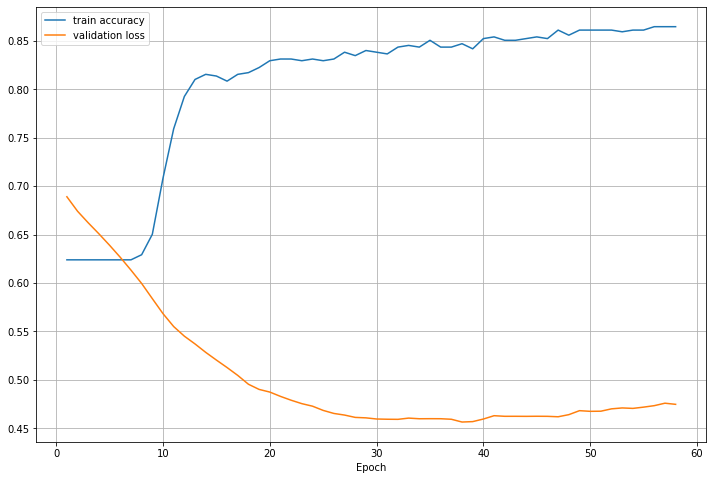

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms=5, label='train accuracy')
plt.plot(xs, y_vloss, ms=5, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()